# Linear Regression

Linear Regression makes prediction by simply computing a weighted sum of the input features, plus a constant called the bias term (or intercept term).

Linear Regression Equation can be written as:

$\hat{y} = \theta_0 + \theta_{1}x_{1} + \theta_{1}x_{1} + \theta_{n}x_{n} $

where,

$\hat{y}$ is the predicted value

n is the number of features

$x_i$ is the $i^th$ feature value

$\theta_j$ is the $j^th$ model parameter (including the bias teram $\theta_0$ and the feature weights $\theta_1$,$\theta_2$,...,$\theta_n$)

The above equation can be written more concisely using vectorized form

$\hat{y} = h_{\theta}(x) = \theta . x$

where,

$\theta$ is the model's parameter vector containing the bias term $\theta_0$ and feature weights $\theta_1$ to $\theta_n$

x is the instance's feature vector containing $x_0$ to $x_n$ with $x_0$ always equal to 1.

$\theta.x$ is the dot product of vectors $\theta$ and x which is ofcourse equal to $\theta_{0}x_{0} + \theta_{1}x_{1} + ... + \theta_{n}x_{n}$

$h_\theta$ is the hypothesis function using models parameter $\theta$

**NOTE:**

In ML, vectors are often represented as *column vectors*. If $\theta$ and x $x$ are column vectors then $\hat{y} = \theta^T.x$ where $\theta_T$ is a transpose of $\theta$.

For example:

$$
\theta = \begin{bmatrix}
            \theta_1 \\
            \theta_2 \\
            \theta_3 \\
        \end{bmatrix}


        and \ x = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix}

        then \ \theta_T = \begin{bmatrix} \theta_1 \theta_2 \theta_3 \end{bmatrix} 
        
\newline

\therefore \theta_T.x = \theta_1.x_1 + \theta_2.x_2 + \theta_3.x_3 
$$

Training model means setting its parameters so that model best fits the training set. For this purpose we need a measure to find how well our model has performed. For Regression common performance model is Root Mean Squared Error (RMSE). Therefore to train a linear regression we need to find value of $\theta$ that minimizes the RMSE. In practice it is simpler to minimize mean square error than RMSE and it leads to same result (because the value that minimizes a function also minimizes its square root).

The MSE of Linear Regression $h_\theta$ on a training set X is:

$$
    MSE(X, h_\theta) = \frac{1}{m} \sum_{i=1}^{m} (\theta^{T}x^{(i)} - y^{(i)})^2
$$

## The Normal Equation

To find a value of $\theta$ that minimizes the cost function, there is *closed-form* solution. In other words, a mathematical equation that gives the result directly called normal equation.

$$
    \hat{\theta} = (X^{T}X)^{-1}X^Ty
$$

where,

$\hat{\theta}$ is the $\theta$ that minimizes the cost function

$y$ is the vector of target values containing $y^{(i)} \ to \ y^{(m)}$

Let’s generate some linear-looking data to test this equation on :

In [1]:
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)

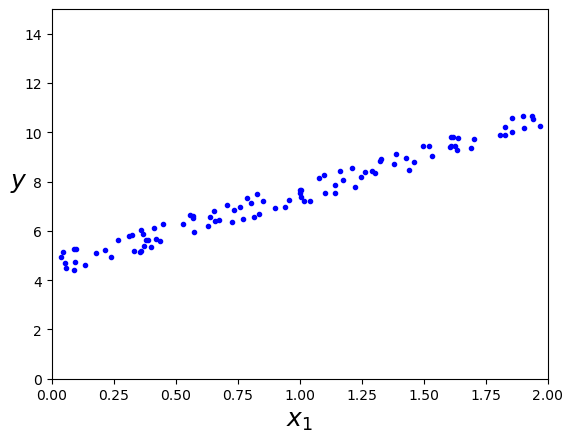

In [2]:
import matplotlib.pyplot as plt

plt.plot(X,y, "b.")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])
plt.show()

Now let's compute $\hat{\theta}$ using the Normal Equation. We will use `inv()` function from Numpy linear algebra module (`np.linalg`) to compute the inverse of matrix and the `dot()` method for matrix multiplication.

In [3]:
X_b = np.c_[np.ones((100,1)),X] # add x0 = 1 to each instance

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

The function that we used to generate the data is $y = 4 + 3x_{1} + Gaussian \ noise$

Let's see what the equation has found


In [4]:
theta_best

array([[4.53035878],
       [3.04843913]])

We would have hoped for $\theta$ = 4 and $\theta$ = 3 instead of $\theta$ = 4.57 and $\theta$ =
2.930. Close enough, but the noise made it impossible to recover the exact
parameters of the original function.

Now we can make predictions using $\hat{\theta}$:

In [5]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new] #add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.53035878],
       [10.62723704]])

Let's plot this model's predictions:

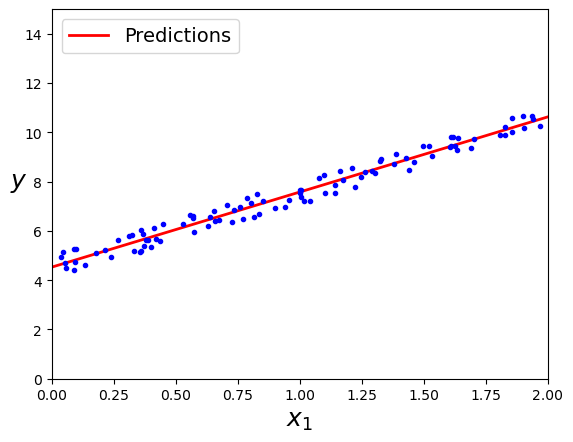

In [6]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X,y,"b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0,2,0,15])
plt.show()

Performing Linear Regression using Scikit-Learn is simple:

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_ , lin_reg.coef_

(array([4.53035878]), array([[3.04843913]]))

In [8]:
lin_reg.predict(X_new)

array([[ 4.53035878],
       [10.62723704]])

The LinearRegression class is based on the `scipy.linalg.lstsq()` function (the name stands for “least squares”), which you could call directly:

In [9]:
theta_best_svd , residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.53035878],
       [3.04843913]])

This above function computes $\hat{\theta} = X^+y$, where $X^+$ is the *pseudoinverse* of X (specifically, the Moore-Penrose inverse). We can use `np.linalg.pinv()` to compute the pseudoinverse directly:

In [10]:
np.linalg.pinv(X_b).dot(y)

array([[4.53035878],
       [3.04843913]])

The pseudoinverse itself is computed using a standard matrix factorization technique called *Singular Value Decomposition* (SVD) that can decompose the training set matrix **X** into the matrix multiplication of three matrices **U $\sum$ $V^T$** . The pseudoinverse is computed as $\bold{X}^+ = \bold{V\sum}^+\bold{U}^T$ . To compute the matrix $\sum^+$, the algorithm takes $\sum$ and sets to zero all values smaller than a tiny threshold value, then it replaces all the non zero values with their inverse, and finally it transposes the resulting matrix. This approach is more efficient than computing the Normal Equation, plus it handles edge cases nicely: indeed the Normal Equation may not work if the matrix $X^TX$ is not invertible (i.e., singular), such as if *m < n* or if some features are redundant, but the pseudoinverse is always defined.

The SVD of a n x n matrix A is $U\sum V^T$

where,

U = m x n matrix of orthonomal eigenvectors of $AA^T$

$V^T$ = transpose of n x n matrix containing the orthonormal eigenvectors of $A^TA$

$\sum$ = a n x n diagonal matrix of singular values which are square roots of eigen values of $A^TA$ 

## Gradient Descent

- General idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

- Suppose you are lost in the mountains in dense fog. You can only feel the slope of the ground below your feet. A good strategy to reach to the downhill quickly is to go in the direction of the steepest slope. That's what gradient descent does.

- It measures the local gradient of the error function with regard to parameter $\theta$, and it goes in the direction of decreasing gradient. Once the gradient is zero, we have reached the minimum!

- Concretly we start by filling $\theta$ a random values (this is called *random initializing*). Then we improve it gradually by taking one baby step at a time, each step attempting to decrease the cost function (e.g. MSE), until the algorithm converges to minimium. See figure below

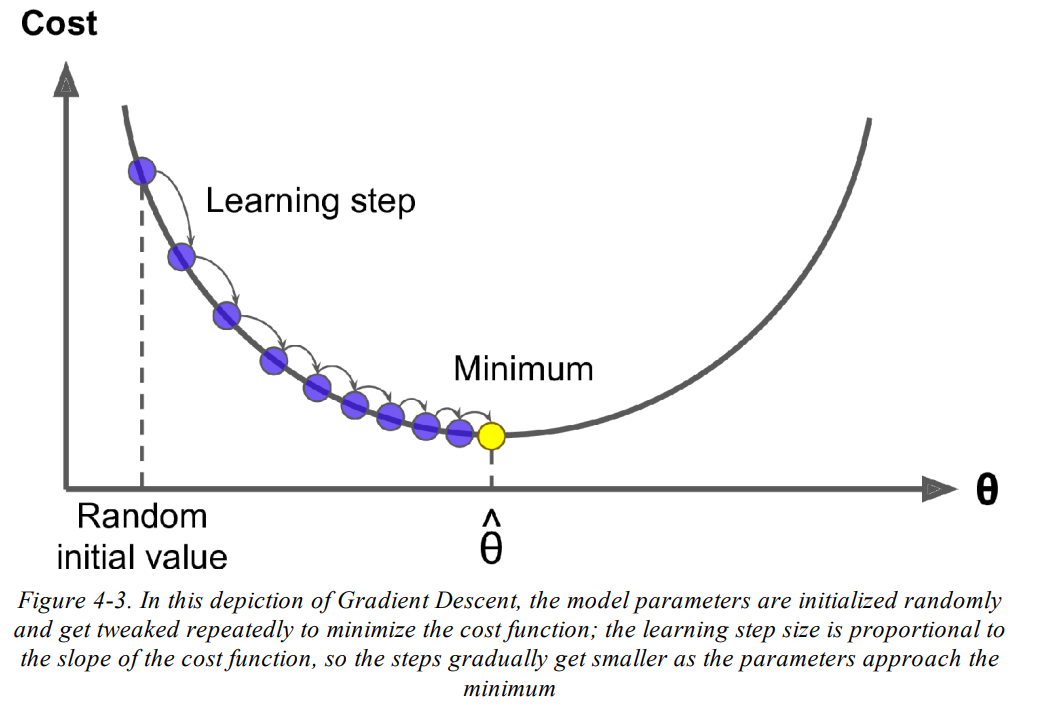

Quick Implementation of Gradient Descent Step

In [11]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.rand(2,1) # random initialization
print(theta)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients

[[0.43830767]
 [0.59541755]]


In [12]:
theta

array([[4.53035878],
       [3.04843913]])

different learning rates

In [13]:
theta_path_bgd = [] #used to store all the theta calculated (bgd = batch gradient desccent)

def plot_gradient_descent(theta,eta, theta_path=None):
    m=len(X_b)
    plt.plot(X,y,"b.")
    n_iterations=1000

    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style="b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        
        gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
        theta = theta - eta*gradients

        if theta_path is not None:
            theta_path.append(theta)
    
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0,2,0,15])
    plt.title(r"$\eta={}$".format(eta), fontsize=16)

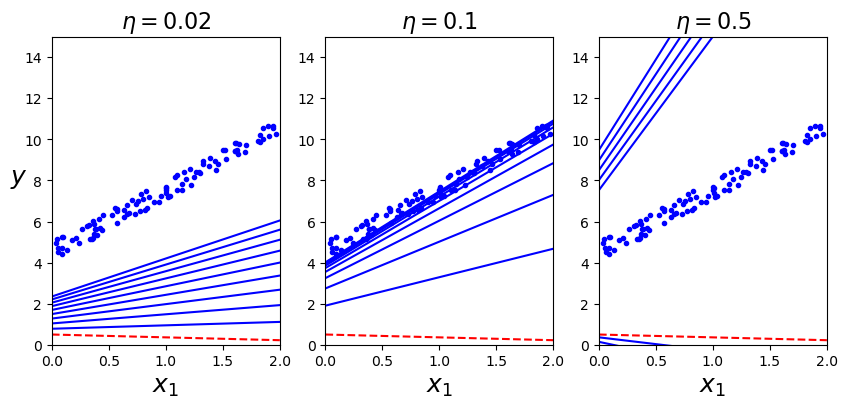

In [14]:
np.random.seed(42)
theta = np.random.randn(2,1) # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

Stochastic Gradient Descent

In [22]:
n_epochs = 50
t0,t1 = 5,50 # learning rate hyperparameters

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta*gradients

In [16]:
theta

array([[4.537858  ],
       [3.04672387]])

first 20 setps of sgd

In [18]:
theta_path_sgd=[]
m = len(X_b)
np.random.seed(42)

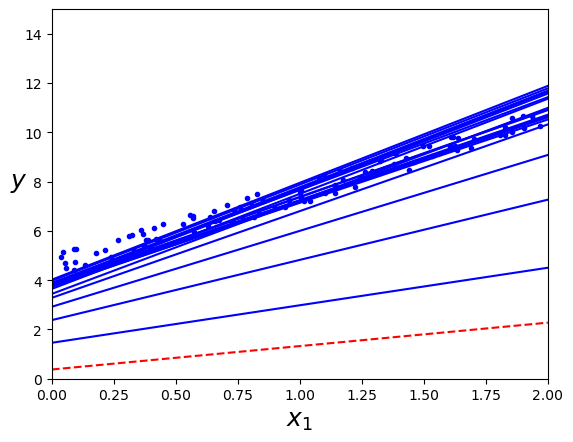

In [20]:

theta = np.random.rand(2,1) #random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch ==0 and  i < 20:
            y_predict = X_new_b.dot(theta)
            style="b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        
        random_index=np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta*gradients
        theta_path_sgd.append(theta)

plt.plot(X,y,"b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0,fontsize=18)
plt.axis([0,2,0,15])
plt.show()
        

To perform Linear Regression using Stochastic GD with Scikit-Learn, we can use the `SGDRegressor` class, which defaults to optimizing the squared error cost function. The following code runs for maximum 1,000 epochs or until the loss drops by less than 0.001 during one epoch (max_iter=1000,
tol=1e-3). It starts with a learning rate of 0.1 (eta0=0.1), using the default learning schedule (different from the preceding one).

In [26]:
from sklearn.linear_model import SGDRegressor
# tol = tolerence
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_regressor.fit(X,y.ravel()) #y.ravel() returns contiguous 1-D array

SGDRegressor(eta0=0.1, penalty=None)

In [27]:
sgd_regressor.intercept_, sgd_regressor.coef_

(array([4.5133383]), array([3.05737228]))

mini batch gradeint descent 

In [33]:
theta_path_mgd=[]

n_iterations = 50
minibatch_size=20

np.random.seed(42)
theta = np.random.randn(2,1) # random initialization

t0,t1 = 200,1000

def learning_schedule(t):
    return t0/(t+t1)

t=0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]

    for i in range(0,m,minibatch_size):
        t+=1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(t)
        theta = theta - eta*gradients
        theta_path_mgd.append(theta)

In [34]:
theta

array([[4.56469776],
       [3.09016632]])

Path taken by three Gradient Descent algo in parameter space during training

In [35]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

In [38]:
theta_path_sgd[:,0]

array([[1.45919949],
       [2.37909676],
       [2.92166731],
       ...,
       [4.53767209],
       [4.53784458],
       [4.53803993]])

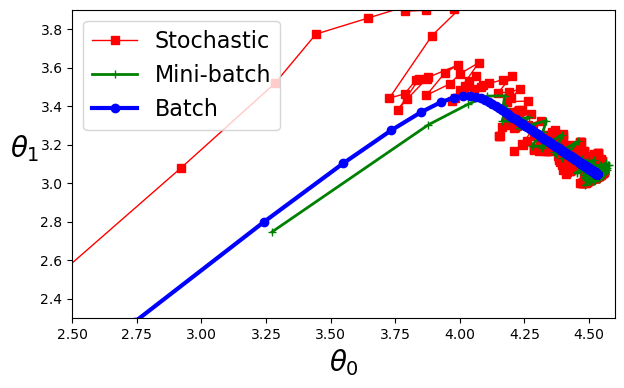

In [50]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.6, 2.3, 3.9])
plt.show()

polynomial regression

In [54]:
m=100
X = 6*np.random.rand(m,1) - 3
y= 0.5*X**2 + X + 2 + np.random.rand(m,1)

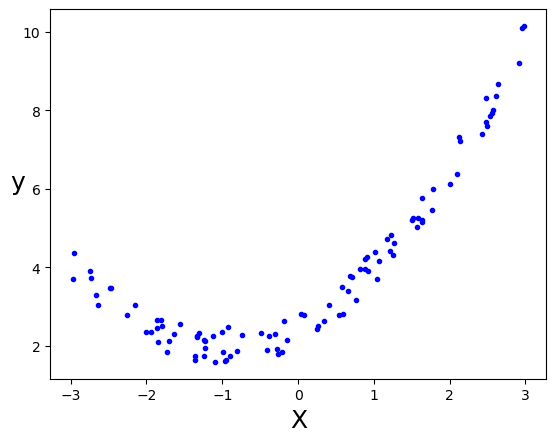

In [58]:
plt.plot(X,y, "b.")
plt.xlabel("X", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.show()

straight line will never fit this data properly. So let’s use Scikit-
Learn’s `PolynomialFeatures` class to transform our training data, adding
the square (second-degree polynomial) of each feature in the training set as a
new feature (in this case there is just one feature)

In [59]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

X_poly now contains the original feature of X plus the square of this feature.
Now you can fit a LinearRegression model to this extended training data

In [61]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)


LinearRegression()

In [62]:
lin_reg.intercept_

array([2.48578368])

In [63]:
lin_reg.coef_

array([[0.96656923, 0.50096864]])

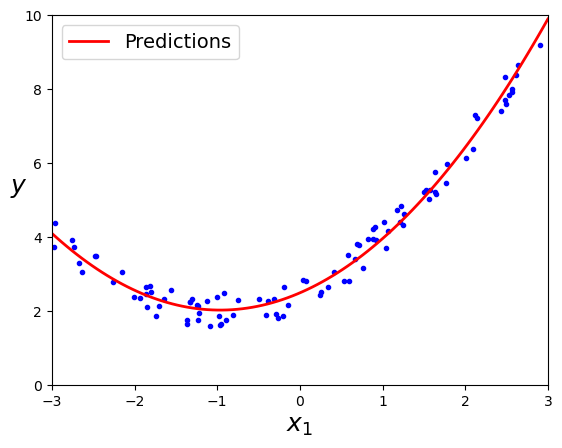

In [70]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

Learning curves

In [73]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X,y):
    X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)
    train_errors, val_errors = [],[]

    for m in range(1, len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Train")
        plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Val")
        plt.legend(loc="upper right", fontsize=14)  
        plt.xlabel("Training set size", fontsize=14) 
        plt.ylabel("RMSE", fontsize=14)              

Let’s look at the learning curves of the plain Linear Regression model (a
straight line

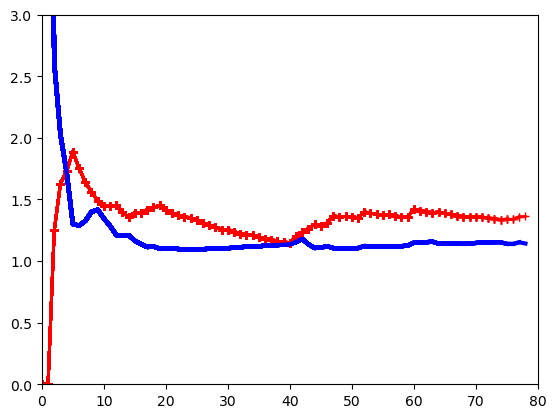

In [75]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X,y)
plt.axis([0, 80, 0, 3])                          
plt.show()

This model that’s underfitting deserves a bit of explanation. First, let’s look
at the performance on the training data: when there are just one or two
instances in the training set, the model can fit them perfectly, which is why
the curve starts at zero. But as new instances are added to the training set, it
becomes impossible for the model to fit the training data perfectly, both
because the data is noisy and because it is not linear at all. So the error on
the training data goes up until it reaches a plateau, at which point adding new
instances to the training set doesn’t make the average error much better or
worse. Now let’s look at the performance of the model on the validation data.
When the model is trained on very few training instances, it is incapable of
generalizing properly, which is why the validation error is initially quite big.
Then, as the model is shown more training examples, it learns, and thus the
validation error slowly goes down. However, once again a straight line
cannot do a good job modeling the data, so the error ends up at a plateau,
very close to the other curve.
These learning curves are typical of a model that’s underfitting. Both curves
have reached a plateau; they are close and fairly high.

Now let’s look at the learning curves of a 10th-degree polynomial model on
the same data

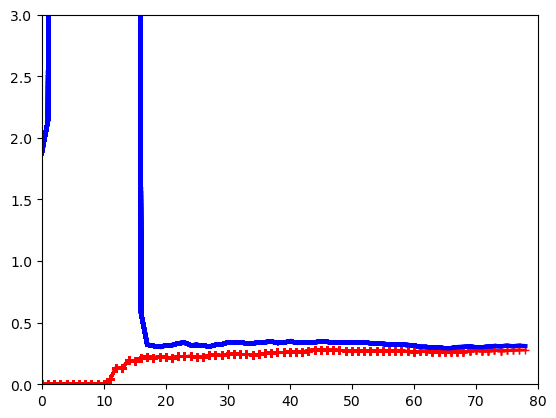

In [76]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0,80,0,3])
plt.show()

These learning curves look a bit like the previous ones, but there are two
very important differences:

- The error on the training data is much lower than with the Linear
Regression model.

- There is a gap between the curves. This means that the model
performs significantly better on the training data than on the
validation data, which is the hallmark of an overfitting model. If
you used a much larger training set, however, the two curves would
continue to get closer

Ridge Regression

In [77]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m,1)
y = 1 + 0.5 * X + np.random.rand(m,1)/1.5
X_new = np.linspace(0,3,100).reshape(100,1)

In [78]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[2.03470631]])

In [79]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[2.03470456]])

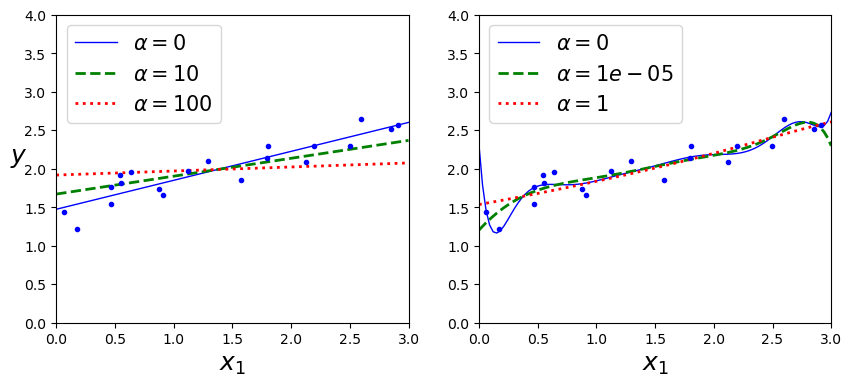

In [81]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                ("std_scaler", StandardScaler()),
                ("regul_reg", model)
            ])
        model.fit(X,y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha={}$".format(alpha))
    plt.plot(X,y,"b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0,3,0,4])

plt.figure(figsize=(10,4))
plt.subplot(121)
plot_model(Ridge,False, alphas=(0,10,100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, True, alphas=(0, 10**-5, 1), random_state=42)
plt.show()

On the left, plain Ridge models are used, leading to linear
predictions. On the right, the data is first expanded using
PolynomialFeatures(degree=10), then it is scaled using a
StandardScaler, and finally the Ridge models are applied to the resulting
features: this is Polynomial Regression with Ridge regularization. Note how
increasing α leads to flatter (i.e., less extreme, more reasonable) predictions,
thus reducing the model’s variance but increasing its bias

Here is how to perform Ridge Regression with Scikit-Learn using a closed-
form solution (a variant of Equation that uses a matrix factorization
technique by André-Louis Cholesky)

In [82]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[2.03470631]])

And using Stochastic Gradient Descent:

In [84]:
sgd_regressor = SGDRegressor(penalty="l2")
sgd_regressor.fit(X,y.ravel())
sgd_regressor.predict([[1.5]])

array([1.94093687])

The penalty hyperparameter sets the type of regularization term to use.
Specifying "l2" indicates that you want SGD to add a regularization term to
the cost function equal to half the square of the ℓ2 norm of the weight vector:
this is simply Ridge Regression

Alternatively we can use the Ridge class with the "sag" solver. Stochastic Average GD is a
variant of Stochastic GD. 

For more details, see the presentation “Minimizing Finite Sums with
the Stochastic Average Gradient Algorithm” by Mark Schmidt et al. from the University of
British Columbia (This is some crazy stuff, needs more mathematical knowlwge, will explore later)

Lasso Regession

The below shows the same thing as above but replaces Ridge models
with Lasso models and uses smaller α values

/home/dell/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.959e-01, tolerance: 2.755e-04
  model = cd_fast.enet_coordinate_descent(


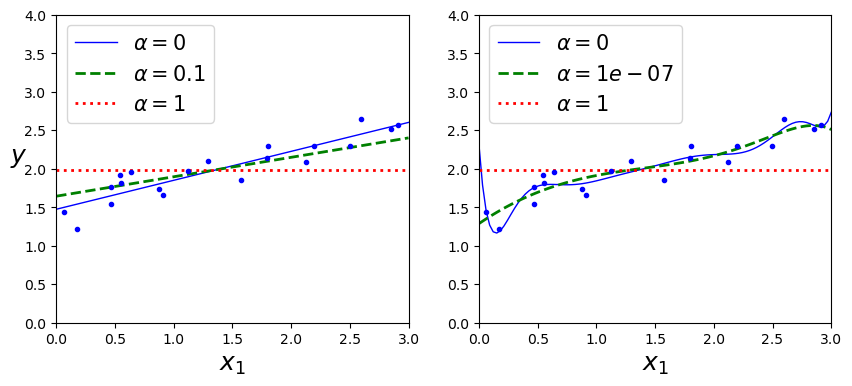

In [85]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(10,4))
plt.subplot(121)
plot_model(Lasso, False, alphas=(0,0.1,1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, True, alphas=(0,10**-7,1), random_state=42)
plt.show()

small Scikit-Learn example using the Lasso class:

In [86]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([2.02180523])

Note that you could instead use SGDRegressor(penalty="l1")

Elastic Net

Here is a short example that uses Scikit-Learn’s ElasticNet (l1_ratio
corresponds to the mix ratio r):

In [87]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([2.02732399])

Early Stopping

In [89]:
np.random.seed(42)

m = 100
X = 6 * np.random.rand(m,1) - 3
y = 2 + X + 0.5 * X**2 + np.random.rand(m,1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [119]:

from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# Note that with warm_start=True, when the fit() method is called it continues training where it left off, instead of restarting from scratch

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

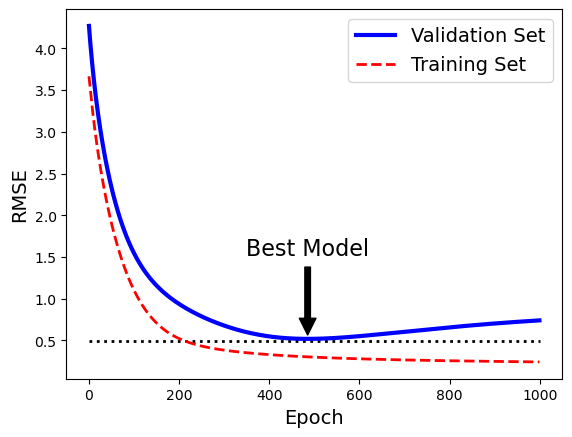

In [120]:
sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 1000
train_errors, val_errors = [],[]

for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best Model', xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse+1),
             ha="center",
             arrowprops=dict(facecolor="black", shrink=0.05),
             fontsize=16)

best_val_rmse -= 0.03 # just to make the graph look better
plt.plot([0,n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation Set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training Set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

Above figure shows a complex model
(in this case, a high-degree Polynomial Regression model) being trained
with Batch Gradient Descent. As the epochs go by the algorithm learns, and
its prediction error (RMSE) on the training set goes down, along with its
prediction error on the validation set. After a while though, the validation
error stops decreasing and starts to go back up. This indicates that the modelhas started to overfit the training data. With early stopping you just stop
training as soon as the validation error reaches the minimum. It is such a
simple and efficient regularization technique that Geoffrey Hinton called it a
“beautiful free lunch.”